In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
# Load MNIST dataset from Scikit-learn
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)
# Normalize pixel values to range [0, 1]
X = X / 255.0
# One-hot encode the labels
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define LeNet architecture using TensorFlow/Keras
model = tf.keras.Sequential([
tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(120, activation='relu'),
tf.keras.layers.Dense(84, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',

loss='categorical_crossentropy',
metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/10
350/350 [==============================] - 12s 6ms/step - loss: 0.4027 - accuracy: 0.8780 - val_loss: 0.1197 - val_accuracy: 0.9638
Epoch 2/10
350/350 [==============================] - 2s 5ms/step - loss: 0.1089 - accuracy: 0.9659 - val_loss: 0.0819 - val_accuracy: 0.9742
Epoch 3/10
350/350 [==============================] - 3s 8ms/step - loss: 0.0747 - accuracy: 0.9771 - val_loss: 0.0782 - val_accuracy: 0.9771
Epoch 4/10
350/350 [==============================] - 2s 6ms/step - loss: 0.0614 - accuracy: 0.9807 - val_loss: 0.0713 - val_accuracy: 0.9766
Epoch 5/10
350/350 [==============================] - 2s 5ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0597 - val_accuracy: 0.9819
Epoch 6/10
350/350 [==============================] - 2s 5ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0596 - val_accuracy: 0.9819
Epoch 7/10
350/350 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0539 - val_accuracy: 0.9834
Epoch

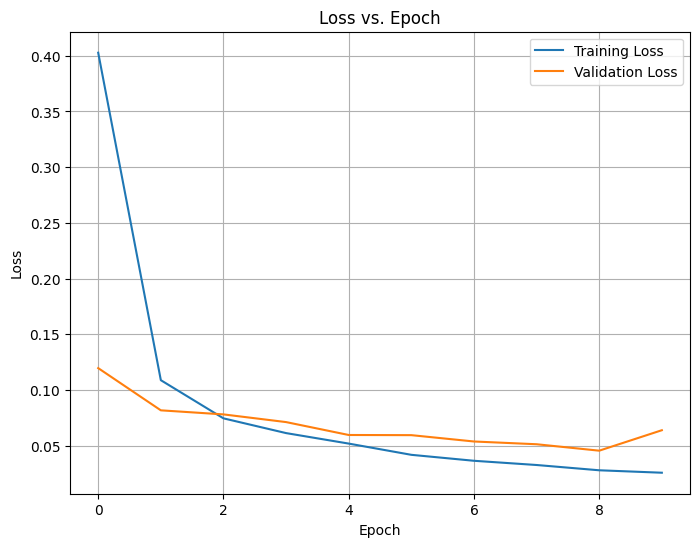

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Epoch')
plt.grid(True)
plt.show()